In [1]:
from audio import *

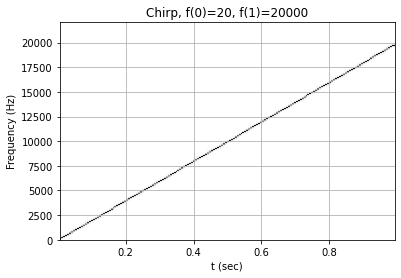

In [2]:
fs = 44100
T = 1
record_time = 10
f0 = 20
f1 = 20000

t = np.linspace(0, T, T*fs)
w = chirp(t, f0=f0, f1=f1, t1=T, method='linear')

ff, tt, Sxx = spectrogram(w, fs=fs, noverlap=256, nperseg=512,nfft=2048)
plt.pcolormesh(tt, ff, Sxx, cmap='gray_r')
plt.title('Chirp, f(0)={}, f({})={}'.format(f0,T,f1))
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

In [3]:
scipy.io.wavfile.write(r"sound_files/chirp.wav", fs, w)

Audio("sound_files/chirp.wav")

In [45]:
record_audio('sound_files/test_chirp.wav',record_time, fs)

Recording
Finished recording


In [7]:
play_audio('sound_files/test_chirp.wav')

In [46]:
signal, fs = get_audio('sound_files/test_chirp.wav')
w_reverse = w[::-1]
output = np.convolve(signal ,w_reverse,mode='same')

(array([246145]),)

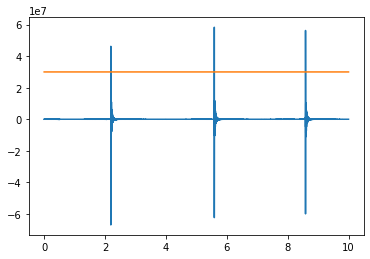

In [49]:
thresh = 30000000

time = np.linspace(0, record_time, len(output))
plt.plot(time,output)
plt.plot(time, np.full((len(time)), thresh))
np.where(output == np.amax(output))

In [51]:
print(get_peaks(output, thresh))

[[41760208.30734127, 96435], [35628385.249502935, 96436], [-67000303.375663392, 96437], [46237509.04286699, 96439], [-53847449.533743218, 96440], [40162831.540891767, 96494], [34517461.094518587, 96495], [58339606.968956739, 246145], [-62385487.150466651, 246147], [52007379.202302188, 246148], [-50246669.664186299, 246150], [48263439.799843058, 246204], [-34055490.279106036, 246206], [32409154.480304487, 378096], [46503211.396627545, 378097], [-59983660.28301841, 378098], [56287036.923420653, 378100], [-47422253.717439786, 378101], [35254593.055808097, 378155], [38089181.457214788, 378156], [-31305232.312048957, 378158]]
